# Compute performance metrics for the given Y and Y_score without sklearn

In [210]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [97]:
a_data = pd.read_csv("5_a.csv")
print(a_data.shape)

(10100, 2)


In [98]:
a_data.head(10)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [99]:
#checking the how many points are either 0 or 1 in the dataset
check = a_data['y'].value_counts()
check

1.0    10000
0.0      100
Name: y, dtype: int64

In [100]:
#ypred=[0 if y_score < 0.5 else 1]
def parting(proba):
    if proba < 0.5:
        return 0
    else:
        return 1

a_data['Y_predict'] = a_data['proba'].apply(parting)
a_data.head(10)

,y,proba,Y_predict
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
5,1.0,0.601600,1
6,1.0,0.666323,1
7,1.0,0.567012,1
8,1.0,0.650230,1
9,1.0,0.829346,1


In [42]:
check1 = a_data['Y_predict'].value_counts()
print(check1)

1    10100
Name: Y_predict, dtype: int64


In [141]:
#confusion matrix
Y_predict = pd.Series(a_data['Y_predict'], name = 'predicted')
Y_actual = pd.Series(a_data['y'], name = 'actual')
confusion = pd.crosstab(Y_actual, Y_predict, margins = True)
confusion

predicted,1,All
actual,,
0.0,100,100
1.0,10000,10000
All,10100,10100


In [142]:
#adding column o
confusion[0] = confusion.apply(lambda row:0, axis = 1)
col_name = [0,1,'All']
confusion.reindex(columns = col_name)
#reindex = placing NA/NaN in locations having no value in the previous index


predicted,0,1,All
actual,,,
0.0,0,100,100
1.0,0,10000,10000
All,0,10100,10100


In [52]:
#performance_matrix
P = confusion['All'][1]
N = confusion['All'][0]
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[1][0]
FN = confusion[0][1]
print(P, N)
print(TP, FP, TN, FN)

10000 100
10000 100 0 0


In [55]:
#finding values for Precision, Recall, F1_Score, Accuracy
Precision = (TP/(TP+FP))
Recall= (TP/(TP+FN))
F1_Score = ((2*Precision*Recall)/(Precision+Recall))
Accuracy= ((TN+TP)/(len(a_data.Y_predict)))
#print all the values
print('Precision:', Precision)
print('Recall:', Recall)
print('F1_Score:', F1_Score)
print('Accuracy:', Accuracy)

Precision: 0.9900990099009901
Recall: 1.0
F1_Score: 0.9950248756218906
Accuracy: 0.9900990099009901


In [65]:
#reverse
Y_sorted = a_data.sort_values('proba', ascending = False)
Y_sorted.head(10)

,y,proba,Y_predict
1664,1.0,0.899965,1
2099,1.0,0.899828,1
1028,1.0,0.899825,1
9592,1.0,0.899812,1
8324,1.0,0.899768,1
2396,1.0,0.899751,1
3789,1.0,0.899467,1
2822,1.0,0.899444,1
2370,1.0,0.899429,1
7636,1.0,0.899415,1


In [66]:
TPR = []
FPR = []
for i in Y_sorted.index:
    T = Y_sorted['proba'][i]
    def parting(proba):
        if proba >= T:
            return 1
        else:
            return 0
    Y_predict = a_data['proba'].apply(parting)
    #confusion matrix
    Y_predict = pd.Series(Y_predict, name = 'predicted')
    Y_actual = pd.Series(a_data['y'], name = 'actual')
    confusion = pd.crosstab(Y_actual, Y_predict, margins = True)
    P = confusion['All'][1]
    N = confusion['All'][0]
    TP = confusion[1][1]
    FP = confusion[1][0]
    TPR.append(TP/P)
    FPR.append(FP/N)
print('AUC Score')
AUC=np.trapz(TPR,FPR)
print(AUC)
    

AUC Score
0.48829900000000004


No handles with labels found to put in legend.


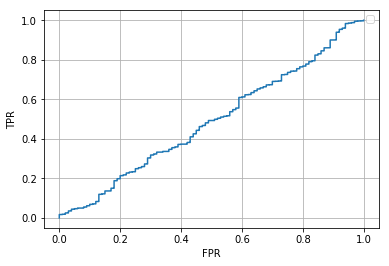

In [68]:
#plotthegraph
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [153]:
import numpy as np
import pandas as pd

In [154]:
# write your code here
b_data = pd.read_csv("5_b.csv")
print(b_data.shape)

(10100, 2)


In [155]:
b_data.head(10)

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
5,0.0,0.190260
6,0.0,0.320328
7,0.0,0.435013
8,0.0,0.284849
9,0.0,0.427919


In [156]:
#checking the how many points are either 0 or 1 in the dataset
check = b_data['y'].value_counts()
check

0.0    10000
1.0      100
Name: y, dtype: int64

In [157]:
#ypred=[0 if y_score < 0.5 else 1]
def parting(proba):
    if proba < 0.5:
        return 0
    else:
        return 1

b_data['Y_predict'] = b_data['proba'].apply(parting)
b_data.head(10)

,y,proba,Y_predict
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0
5,0.0,0.190260,0
6,0.0,0.320328,0
7,0.0,0.435013,0
8,0.0,0.284849,0
9,0.0,0.427919,0


In [158]:
check1 = b_data['Y_predict'].value_counts()
print(check1)

0    9806
1     294
Name: Y_predict, dtype: int64


In [159]:
#confusion matrix
Y_predict = b_data['Y_predict']
actual = b_data['y']
Y1_predict = pd.Series(Y_predict, name = 'predicted')
Y1_actual = pd.Series(actual, name = 'actual')
confusion = pd.crosstab(Y1_actual, Y1_predict, margins = True)
confusion

predicted,0,1,All
actual,,,
0.0,9761,239,10000
1.0,45,55,100
All,9806,294,10100


In [161]:
#performance_matrix
P = confusion['All'][1]
N = confusion['All'][0]
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[1][0]
FN = confusion[0][1]
print(P, N)
print(TP, FP, TN, FN)

100 10000
55 239 9761 45


In [162]:
#finding values for Precision, Recall, F1_Score, Accuracy
Precision = (TP/(TP+FP))
Recall= (TP/(TP+FN))
F1_Score = ((2*Precision*Recall)/(Precision+Recall))
Accuracy= ((TN+TP)/(len(b_data.Y_predict)))
#print all the values
print('Precision:', Precision)
print('Recall:', Recall)
print('F1_Score:', F1_Score)
print('Accuracy:', Accuracy)

Precision: 0.1870748299319728
Recall: 0.55
F1_Score: 0.2791878172588833
Accuracy: 0.9718811881188119


In [163]:
#reverse
Y_sorted = b_data.sort_values('proba', ascending = False)
Y_sorted.head(10)

,y,proba,Y_predict
8446,1.0,0.595294,1
1978,1.0,0.594808,1
1657,1.0,0.592198,1
110,1.0,0.590171,1
8578,1.0,0.588718,1
2208,1.0,0.585175,1
7811,1.0,0.583235,1
7042,1.0,0.582210,1
2183,1.0,0.582020,1
7863,1.0,0.581772,1


In [164]:
TPR = []
FPR = []
for i in Y_sorted.index:
    T = Y_sorted['proba'][i]
    def parting(proba):
        if proba >= T:
            return 1
        else:
            return 0
    Y_predict = b_data['proba'].apply(parting)
    #confusion matrix
    Y_predict = pd.Series(Y_predict, name = 'predicted')
    Y_actual = pd.Series(b_data['y'], name = 'actual')
    confusion = pd.crosstab(Y_actual, Y_predict, margins = True)
    P = confusion['All'][1]
    N = confusion['All'][0]
    TP = confusion[1][1]
    FP = confusion[1][0]
    TPR.append(TP/P)
    FPR.append(FP/N)
print('AUC Score')
AUC=np.trapz(TPR,FPR)
print(AUC)
    

AUC Score
0.9377570000000001


No handles with labels found to put in legend.


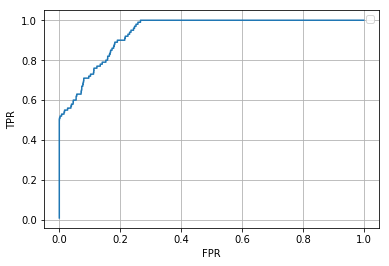

In [165]:
#plotthegraph
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [211]:
# write your code
c_data = pd.read_csv("5_c.csv")
c_data.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [212]:
Y_sorted = c_data.sort_values('prob', ascending = False)
Y_sorted.head(10)

,y,prob
2634,1,0.957747
2548,1,0.951437
2447,1,0.948638
2788,1,0.944094
2456,1,0.941113
2469,1,0.921611
2599,1,0.918113
2515,1,0.916364
2294,1,0.913375
2702,1,0.913280


In [213]:
A = []
for i in Y_sorted.index[0:2800]:
    T = Y_sorted['prob'][i]
    def parting(proba):
        if proba >= T:
            return 1
        else:
            return 0
    Y_predict = c_data['prob'].apply(parting)
    #confusion matrix
    Y_predict = pd.Series(Y_predict, name = 'predicted')
    Y_actual = pd.Series(c_data['y'], name = 'actual')
    confusion = pd.crosstab(Y_actual, Y_predict, margins = True)
    FP = confusion[1][0]
    FN = confusion[0][1]
    A.append((T,(500*FN+100*FP)))
A = sorted(A, key = lambda tuple: tuple[1])
print("The best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric")
print(A[0][0])
    

The best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric
0.2300390278970873


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [187]:
# write your code
#MSE
d_data = pd.read_csv('5_d.csv')
d_data.head(10)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
5,133.0,153.0
6,148.0,139.0
7,172.0,145.0
8,153.0,162.0
9,162.0,154.0


In [188]:
print(d_data.shape)

(157200, 2)


In [189]:
#Compute Mean Square Error 
d_data['Y_error'] = d_data.apply(lambda val: (val.y) - (val.pred), axis = 1)
print(d_data.head())

       y   pred  Y_error
0  101.0  100.0      1.0
1  120.0  100.0     20.0
2  131.0  113.0     18.0
3  164.0  125.0     39.0
4  154.0  152.0      2.0


In [190]:
mse = 0
for i in range(len(d_data.Y_error)):
    mse += ((d_data.Y_error[i])**2)
MSE = (mse/len(d_data.Y_error))
print("Mean Square Error value is", MSE)


Mean Square Error value is 177.16569974554707


In [191]:
#R^2 error
SS_reg = 0
SS_tot = 0
R_seq = 0
m = np.mean(d_data['y'])
for i in range(len(d_data.Y_error)):
    SS_reg += ((d_data.Y_error[i])**2)
    SS_tot += ((d_data['y'][i] - m)**2)
R_seq = 1-(SS_reg/SS_tot)
print("R_seq----> Error is",R_seq)

R_seq----> Error is 0.9563582786990964


In [192]:
#Modified Mean Absolute Percentage Error
e = 0
a = 0
for i in range(len(d_data.Y_error)):
    e += abs(d_data.Y_error[i])
    a += d_data['y'][i]
MMAP = e/a
print("Modified Mean Absolute Percentage Error is:",MMAP)

Modified Mean Absolute Percentage Error is: 0.1291202994009687


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>